In [ ]:
## Upload the image data (mammograms)
from google.colab import files
upload = files.upload()

Saving Mammograms.zip to Mammograms.zip


In [ ]:
#unzipping the data
import zipfile
import os

In [ ]:
#unzipping the data
with zipfile.ZipFile('Mammograms.zip', 'r') as zip_ref:
    zip_ref.extractall('mammogram')

In [ ]:
#provides the directory
print("Root contents", os.listdir('mammogram'))

Root contents ['Mammograms']


In [ ]:
#the list inside mammogram folder
print("Inside Mammograms", os.listdir('mammogram'))

Inside MammogramS ['Mammograms']


In [ ]:
#list inside mammogram mammogram
print("Inside mammogram:", os.listdir('mammogram/Mammograms'))

Inside mammogram: ['train', 'test']


**Data Augmentation**
We will augment the training set to increase the amount of images available for training the model

In [ ]:
#importing the image datagenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
#defining the generator with augmentation parameters
train_datagen = ImageDataGenerator(
        rescale=1./255,  #normalize the pixels to range from 0-1
        shear_range=0.2, #sheared up to about 20% of its width and height
        zoom_range=0.2,  #zoomed in and out up to 20%
        width_shift_range=0.2, #an image can shift up to 20% of its width
        height_shift_range=0.2, #an image can shift up to 20 % of its height
        horizontal_flip=True,  # swap the image left and right
        fill_mode = 'nearest' # fill the empty pixels (after transformation ) with the closest ones
        )


In [ ]:
#loading the training images
train_generator = train_datagen.flow_from_directory(
        'mammogram/Mammograms/train',
        target_size = (256, 256), # resize all images to a fixed input size
        batch_size = 32, # process 32 images per time instead of processing images one by one
        class_mode = "binary",# for 0 and 1 classes
        color_mode = 'grayscale' # load grayscale images
        )

Found 1904 images belonging to 2 classes.


In [ ]:
#loading the testing split.
#We will only normalize the testing split since the model expects images of pixel values ranging from 0 to one


test_datagen = ImageDataGenerator(rescale=1./255) #parameter for normalization


#LOADING THE TESTING SPLIT
test_generator = test_datagen.flow_from_directory(
        'mammogram/Mammograms/test',  #path to the testing split
        target_size=(256, 256), #resizing the testing split
        batch_size=32,
        class_mode='binary',
        color_mode = "grayscale")

Found 241 images belonging to 2 classes.


**BUILDING THE MODEL ARCHTECTURE**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
#defining the model
model = models.Sequential()

#1st layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
#maxpooling
model.add(layers.MaxPooling2D((2, 2)))

#2nd layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#maxpooling
model.add(layers.MaxPooling2D((2, 2)))

#3rd layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#maxpooling
model.add(layers.MaxPooling2D((2, 2)))

#flattening
model.add(layers.Flatten())

#dense layers   (I only used two layers )
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#compiling the model

model.compile(optimizer='adam', #optimizer to adjust the learning rate as the model trainis
              loss='binary_crossentropy',  # binary_crossentropy as our loss function because images are binary
              metrics=['accuracy']  # report accuracy during prediction
              )

In [ ]:
#The model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     7,372,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,465,601 (28.48 MB)

 Trainable params: 7,465,601 (28.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Training the model
history = model.fit(train_generator, #training split
                    epochs = 10, #number of epochs
                    validation_data = test_generator, #testing split
                    verbose = 1 #print progress
                    )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 287s 5s/step - accuracy: 0.4839 - loss: 0.7164 - val_accuracy: 0.2573 - val_loss: 0.6926
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 271s 5s/step - accuracy: 0.5264 - loss: 0.6903 - val_accuracy: 0.6266 - val_loss: 0.6024
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 282s 5s/step - accuracy: 0.5362 - loss: 0.6731 - val_accuracy: 0.4274 - val_loss: 0.5397
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 310s 5s/step - accuracy: 0.5929 - loss: 0.6553 - val_accuracy: 0.3859 - val_loss: 0.6074
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 330s 5s/step - accuracy: 0.6096 - loss: 0.6495 - val_accuracy: 0.4357 - val_loss: 0.5068
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 268s 4s/step - accuracy: 0.6571 - loss: 0.6074 - val_accuracy: 0.4523 - val_loss: 0.5997
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 277s 5s/step - accuracy: 0.6851 - loss: 0.5333 - val_accuracy: 0.4108 - val_loss: 0.6780
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 314s 4s/step - accuracy: 0.6990 - loss: 0.5109 - val_accuracy: 0.6017 - v

In [ ]:
#evaluating the model
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8094 - loss: 0.3315
Test Loss: 0.324884831905365
Test Accuracy: 0.8132780194282532


In [ ]:
loss, accuracy = model.evaluate(train_generator)
print("Train Loss:", loss)
print("Train Accuracy:", accuracy)

60/60 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.8092 - loss: 0.3961
Train Loss: 0.38176020979881287
Train Accuracy: 0.8067227005958557


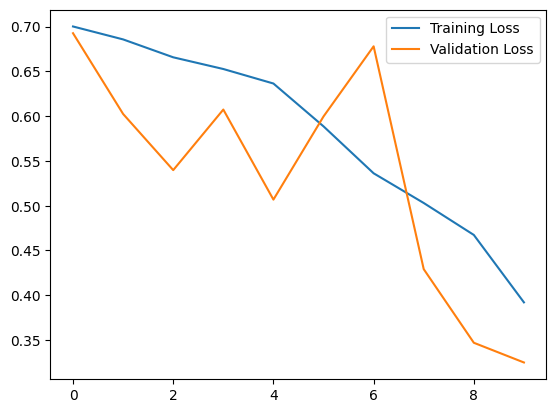

In [ ]:
#Overfitting check
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
#

**Plot Training History**

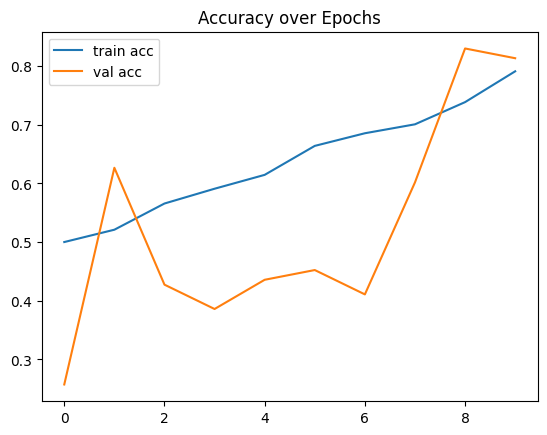

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

In [ ]:
# keras format with weights
import os
if os.path.exists('/content/drive/MyDrive'):
  model.save("/content/drive/MyDrive/mammogram_model.keras")
  print("Model saved successfully to Google Drive!")
else:
  print("Google Drive not mounted. Please mount Google Drive and try again.")

Model saved successfully to Google Drive!


In [ ]:
##saving the model
#saving as H5
model.save('/content/drive/MyDrive/mammogram_h5_model.h5')